In [1]:
# importing packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing the dataset
cfe_df = pd.read_csv('car_fuel_efficiency.csv')
cfe_df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
# looking at the car fuel efficiency dataframe
display(cfe_df.info())
display(cfe_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


None

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9704,9704,9704,9202.000000,9704.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Europe,Gasoline,All-wheel drive,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3254,4898,4876,NaN,NaN
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,NaN,NaN,NaN,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,NaN,NaN,NaN,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,NaN,NaN,NaN,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,NaN,NaN,NaN,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,NaN,NaN,NaN,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,NaN,NaN,NaN,1.000000,16.707965


In [4]:
# count of missing values
cfe_df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

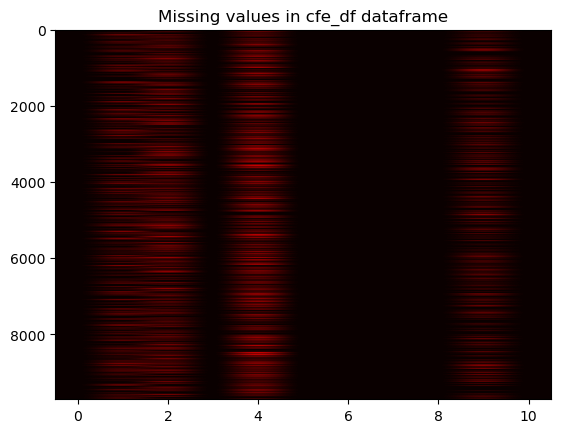

In [5]:
# visualizing the missing values
plt.imshow(cfe_df.isnull(), cmap='hot', aspect='auto')
plt.title('Missing values in cfe_df dataframe')
plt.show()

Only numerical features contain missing values

In [6]:
# filling missing values with zeros
cfe_df_filled = cfe_df.fillna(0)
cfe_df_filled.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [7]:
# creating split of train, validation, test 60%, 20%, 20% data
from sklearn.model_selection import train_test_split

full_train_df, test_df = train_test_split(cfe_df_filled, test_size=0.2, random_state=1)

train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=1)

# cross checking the splits
print(len(train_df), len(val_df), len(test_df))
print(round(len(train_df)/len(cfe_df_filled), 2), round(len(val_df)/len(cfe_df_filled), 2), round(len(test_df)/len(cfe_df_filled), 2))

5822 1941 1941
0.6 0.2 0.2


In [8]:
# resetting indices of the newly split dfs
full_train_df = full_train_df.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [9]:
# target variables
y_full_train = full_train_df['fuel_efficiency_mpg'].values
y_train = train_df['fuel_efficiency_mpg'].values
y_val = val_df['fuel_efficiency_mpg'].values
y_test = test_df['fuel_efficiency_mpg'].values

In [10]:
# removing  target vars from feature set
del full_train_df['fuel_efficiency_mpg']
del train_df['fuel_efficiency_mpg']
del val_df['fuel_efficiency_mpg']
del test_df['fuel_efficiency_mpg']